Linear regression 을 학습하며, 기계학습의 원리 및 TensorFlow 를 익히는 notebook 입니다.

**라이브러리 Import 하기**

In [1]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


**X and Y data (given)**

In [2]:
x_train = [1, 2, 3, 4, 5, 6]
#y_train = [2, 4, 6, 8, 10] #y = 2x
#y_train = [3, 5, 7, 9, 11] #y = 2x +1
y_train = [0.7, 1.2, 1.7, 2.2, 2.7, 3.2] #y = 0.5x +0.2

signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise

# 다음의 것들도 해보시오
#y_train = [2, 4, 6] # 그냥 x_train 에 2배 곱해서 생성
#y_train = [3, 5, 7]

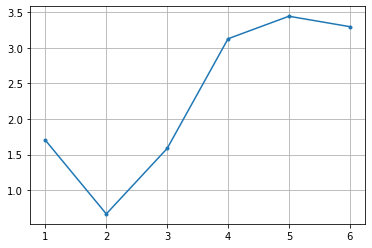

In [3]:
plt.plot(x_train, y_train, '.-')
plt.grid()

**Initialization**

In [4]:
useRandom = False

In [5]:
if useRandom:
   W = tf.Variable(tf.random_normal([1]), name='weight')
   b = tf.Variable(tf.random_normal([1]), name='bias')
else:
    w0 = 4.0;
    b0 = 2.0;

    W = tf.Variable(w0*tf.ones([1]), name='weight')
    b = tf.Variable(b0*tf.ones([1]), name='bias')

**Our hypothesis**
$$ H(x)=Wx + b $$

In [6]:
hypothesis = x_train * W + b

**cost/loss function 정의하기**
* loss of one training example : 
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [7]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

**Optimizer**

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)


**Launch the graph in a session**

In [9]:
sess = tf.Session()

**Initializes global variables in the graph.** 

In [10]:
sess.run(tf.global_variables_initializer())

In [11]:
nb_epoch = 1001
vloss = [] #empty list
vb = [] #empty list
vw = [] #empty list

for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    b1 = sess.run(b)
    w1 = sess.run(W)
    vloss.append(loss1)
    vb.append(b1)
    vw.append(w1)

    if step % 50 == 0: # 200번마다
        print(step, '\t', loss1, '\t', w1, '\t', b1)

0 	 103.621185 	 [2.8377442] 	 [1.7260876]
50 	 0.3816465 	 [0.38779736] 	 [1.0428376]
100 	 0.36542162 	 [0.40827444] 	 [0.9551711]
150 	 0.35416523 	 [0.42533046] 	 [0.88215095]
200 	 0.3463558 	 [0.43953693] 	 [0.8213303]
250 	 0.34093788 	 [0.45136988] 	 [0.77067095]
300 	 0.33717906 	 [0.4612259] 	 [0.7284754]
350 	 0.3345714 	 [0.46943527] 	 [0.6933294]
400 	 0.3327622 	 [0.47627312] 	 [0.66405517]
450 	 0.331507 	 [0.48196852] 	 [0.63967216]
500 	 0.3306362 	 [0.4867125] 	 [0.61936235]
550 	 0.33003208 	 [0.49066383] 	 [0.6024458]
600 	 0.32961288 	 [0.49395502] 	 [0.5883556]
650 	 0.32932213 	 [0.49669635] 	 [0.5766194]
700 	 0.32912034 	 [0.4989797] 	 [0.56684387]
750 	 0.32898048 	 [0.50088155] 	 [0.55870163]
800 	 0.32888338 	 [0.50246567] 	 [0.5519198]
850 	 0.32881597 	 [0.50378513] 	 [0.5462709]
900 	 0.32876924 	 [0.5048841] 	 [0.54156595]
950 	 0.3287368 	 [0.50579953] 	 [0.5376469]
1000 	 0.32871428 	 [0.50656205] 	 [0.53438246]


Text(0, 0.5, 'loss')

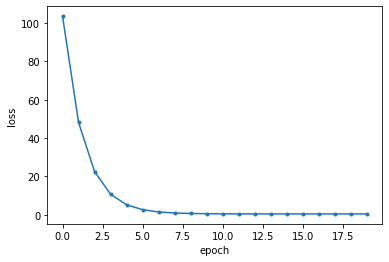

In [12]:
plt.plot(vloss[:20],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'b')

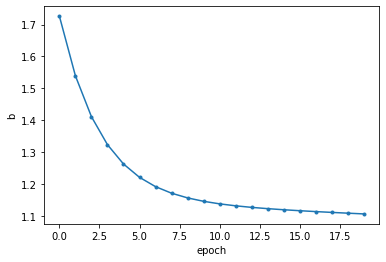

In [13]:
plt.plot(vb[:20],'.-')
plt.xlabel('epoch')
plt.ylabel('b')

Text(0, 0.5, 'W')

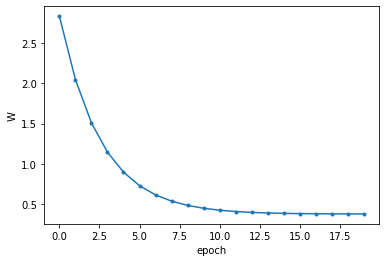

In [14]:
plt.plot(vw[:20],'.-')
plt.xlabel('epoch')
plt.ylabel('W')


**학습완료**

In [15]:
w1 = sess.run(W)[0] # 기울기
b1 = sess.run(b)[0] # bias

출력해보기

In [16]:
print(w1, b1)

0.50656205 0.53438246


In [17]:
str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

y = 0.50656205x + 0.53438246


Text(0.5, 1.0, 'y = 0.50656205x + 0.53438246')

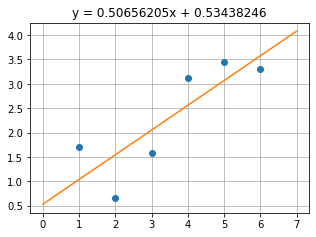

In [18]:
plt.figure(figsize=(5,3.5)) # figsize를 바꾸어보세요
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)

### 스스로 해보기
#아래 부분을 수정해서 처음부터 다시 진행해보기 바랍니다. 

* 예1) 노이즈를 다르게 준다
```
x_train = [1, 2, 3]
y_train = [2+0.1, 4-0.3, 6+0.15] # 약간의 noise 추가
```
* 예2) 데이터의 갯수를 지금은 세 개의 점으로 했으나 더 늘려서도 해본다.

* 예3) 데이터의 모델을 현재는 y=2x+0 으로 해서 만들었으나, 바꾸어본다.
```
y=3x-5 
y=1.2x + 3
```

* 예4) 초기값인 w0, b0를 다르게 설정해본다.
```
w0 = 7.0;
b0 = 5.0;
```

### R-Squared

R-Squared란? 모델이 데이터에 얼마나 적합한 지 수치적으로 결정하는 방법.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import random
%matplotlib inline

### MSE(Mean Squared Error)

In [20]:
x = [[1], [2], [3], [4], [5], [6]]
y = [[0.7], [1.2], [1.7], [2.2], [2.7], [3.2]]
y = np.array(y)
x = np.array(x)
mean = (0.7+1.2+1.7+2.2+2.7+3.2)/5 #데이터의 평균값
print(y)

[[0.7]
 [1.2]
 [1.7]
 [2.2]
 [2.7]
 [3.2]]


Text(0, 0.5, 'Y')

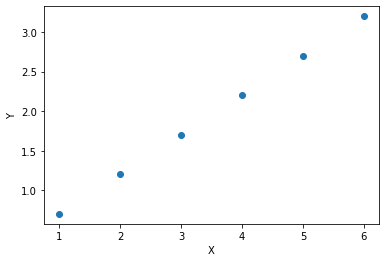

In [21]:
plt.plot(x, y, marker='o',linestyle='')
plt.xlabel('X')
plt.ylabel('Y')

In [22]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

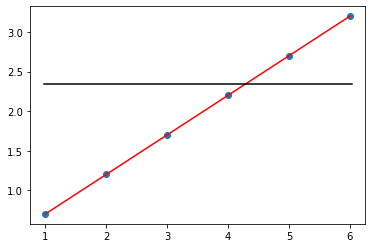

In [25]:
plt.plot(x, y, marker='o',linestyle='')
plt.plot(x,lr.predict(x),color='red')
plt.axhline(y=mean,xmin=0.04,xmax=0.96,color='black')

In [26]:
mean_squared_error(y,lr.predict(x))

0.0

In [27]:
print(lr.predict(x))

[[0.7]
 [1.2]
 [1.7]
 [2.2]
 [2.7]
 [3.2]]


In [29]:
def myMSE(X,Y,line):
    err = 0
    #for i in range(len(X)): #예측값 MSE 구하기
    #   err += (Y[i][0]-line[i][0])**2
    
    if (str(type(line)) == "<class 'float'>"): #평균 MSE 구하기
        for i in range(len(X)):
            err += (Y[i][0]-line)**2
            
    else:
        for i in range(len(X)): #예측값 MSE 구하기
            err += (Y[i][0]-line[i][0])**2
            
    MSE = err/len(X)
    return MSE

In [30]:
print("MSE : ", myMSE(x,y,lr.predict(x)))

MSE :  0.0


### R-squared

In [31]:
lr.score(x, y)

1.0

In [32]:
def myRsq(X,Y,model):
    
    #평균구하기
    hap = 0
    for i in range(len(X)):
        hap += Y[i][0]
    mean = float(hap/len(X))
    print("평균 : ", mean)
    
    #모델 fit하기
    model.fit(X,Y)
    
    #MSE와 R-squared 구하기
    reg_mse = myMSE(X,Y,model.predict(X))
    avg_mse = myMSE(X, Y, mean)
    r = 1-(reg_mse/avg_mse)
    
    print("R-squared : ", r)

In [33]:
myRsq(x,y,LinearRegression())

평균 :  1.95
R-squared :  1.0
